In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
import pickle
import matplotlib.pylab as plt
import numpy as np

In [ ]:
with open('/content/drive/My Drive/data_sets_ct/lung_cancer_train.pkl', 'rb') as f:
    data = pickle.load(f)
    data

In [ ]:
data

,label1,mask,hu_array,hu_array_old
0,LR2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1024.0, -1024.0, -1024.0, -1024.0, -1024.0,..."
1,LR2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1024.0, -1024.0, -1024.0, -1024.0, -1024.0,..."
2,LR2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1024.0, -1024.0, -1024.0, -1024.0, -1024.0,..."
3,LR2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1024.0, -1024.0, -1024.0, -1024.0, -1024.0,..."
4,LR2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1024.0, -1024.0, -1024.0, -1024.0, -1024.0,..."
...,...,...,...,...
703,LR4B,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1015.0, -1024.0, -972.0, -975.0, -1013.0, -..."
704,LR4B,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1022.0, -1024.0, -957.0, -987.0, -1022.0, -..."
705,LR4B,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1024.0, -1024.0, -951.0, -998.0, -1019.0, -..."
706,LR4B,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[-1024.0, -1009.0, -968.0, -1022.0, -1007.0, ..."


In [ ]:
data['hu_array_old'][0].shape, data['hu_array'][0].shape, data['mask'][0].shape

((512, 512), (512, 512), (512, 512))

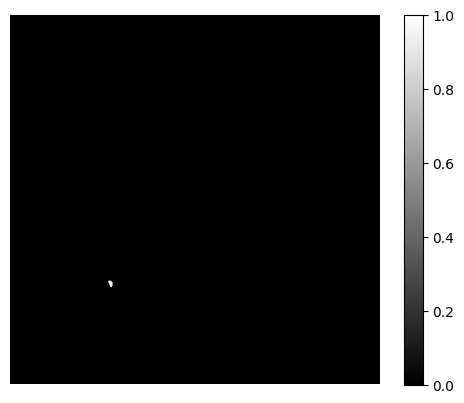

In [ ]:
plt.imshow(data['mask'][0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

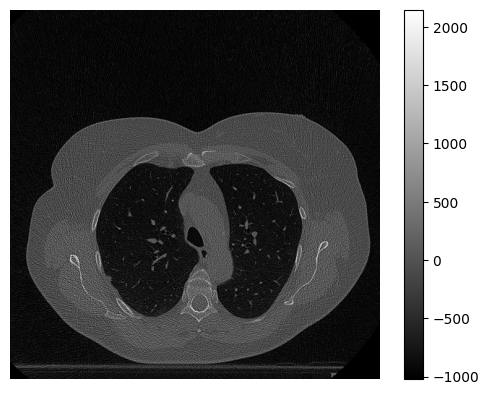

In [ ]:
plt.imshow(data['hu_array_old'][0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

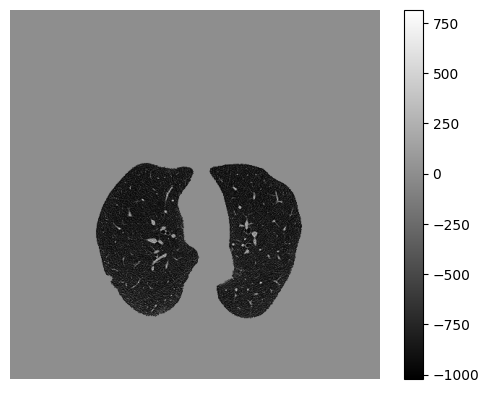

In [ ]:
plt.imshow(data['hu_array'][0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

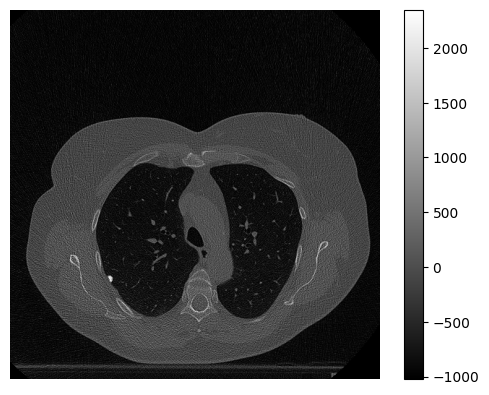

In [ ]:
plt.imshow(data['hu_array_old'][0] + data['mask'][0]*2000, cmap='gray')
plt.axis('off')  # Turn off axis
plt.colorbar()
plt.show()

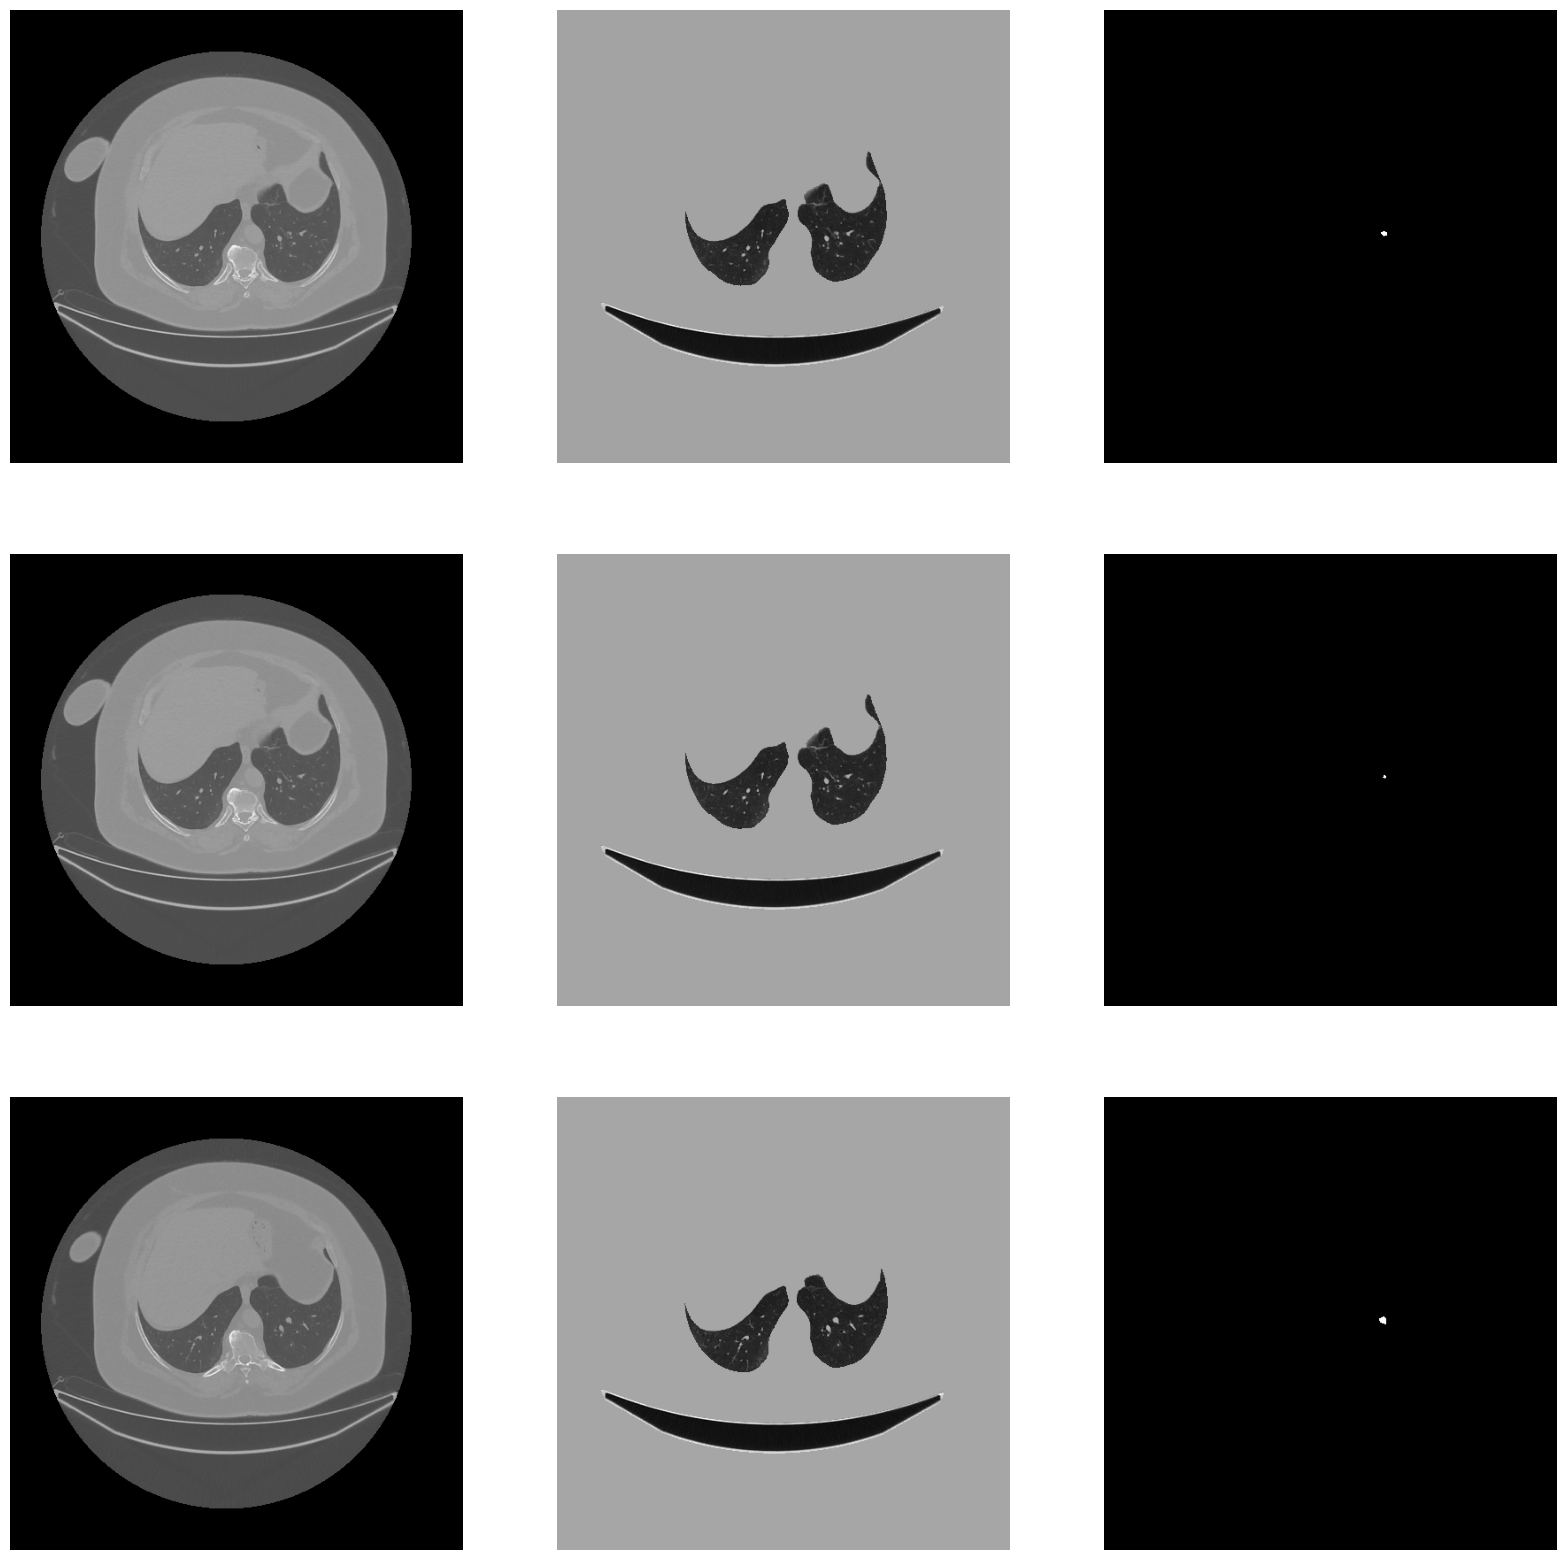

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
header = ['hu_array_old', 'hu_array','mask']
for i in range(3):
  for j in range(3):
    axs[i, j].imshow(data[header[j]][i+100], cmap='gray')
    axs[i, j].axis('off')

plt.show()

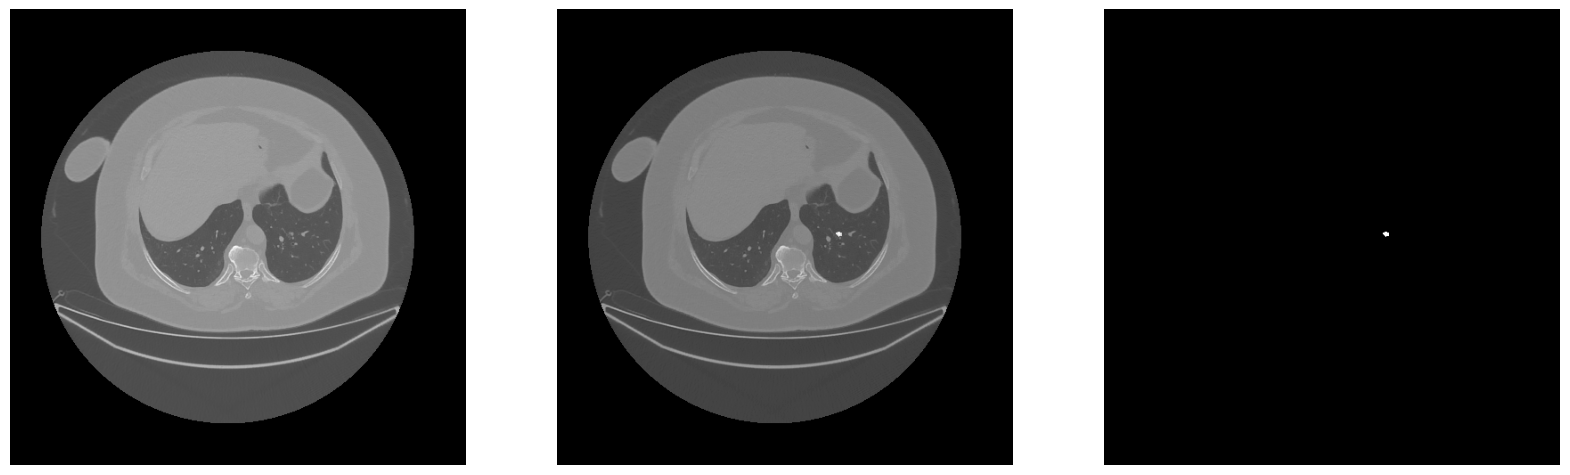

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].imshow(data['hu_array_old'][100], cmap='gray')
axs[0].axis('off')  # Turn off axis

axs[1].imshow(data['hu_array_old'][100] + data['mask'][100]*2000, cmap='gray')
axs[1].axis('off')  # Turn off axis

axs[2].imshow(data['mask'][100], cmap='gray')
axs[2].axis('off')  # Turn off axis

plt.show()